In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data from iRegulon: converted to Python dictionary (dict) of lists
data = {
    "ClusterCode": ["T1", "M1", "T2", "M4", "M6", "M7", "M8", "M9", "M10", "M12", "M13", "M15", "M17", "M18", "M20", "M21", "M23", "M24", "M25", "M27"],
    "TF": ["REST", "GFI1", "TEAD4", "MYF5", "HLTF", "REST", "NKX2-5", "BCL6", "RORC", "CNOT4", "HLF", "RARA", "GPANK1", "JAZF1", "MEIS3", "SNAPC5", "PBX1", "PKM", "CRX", "TEAD1"],
    "NES": [5.609, 5.483, 4.791, 4.12, 4.04, 3.928, 3.921, 3.897, 3.82, 3.76, 3.658, 3.506, 3.4, 3.381, 3.316, 3.205, 3.124, 3.104, 3.046, 3.006],
    "#Targets": [23, 17, 8, 14, 16, 12, 7, 21, 20, 19, 9, 12, 18, 8, 7, 5, 10, 16, 5, 7],
    "#Motifs/Tracks": [42, 3, 1, 2, 3, 9, 1, 11, 5, 4, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1]
}

df = pd.DataFrame(data)

In [2]:
df = df.loc[df.groupby('TF')['NES'].idxmax()]

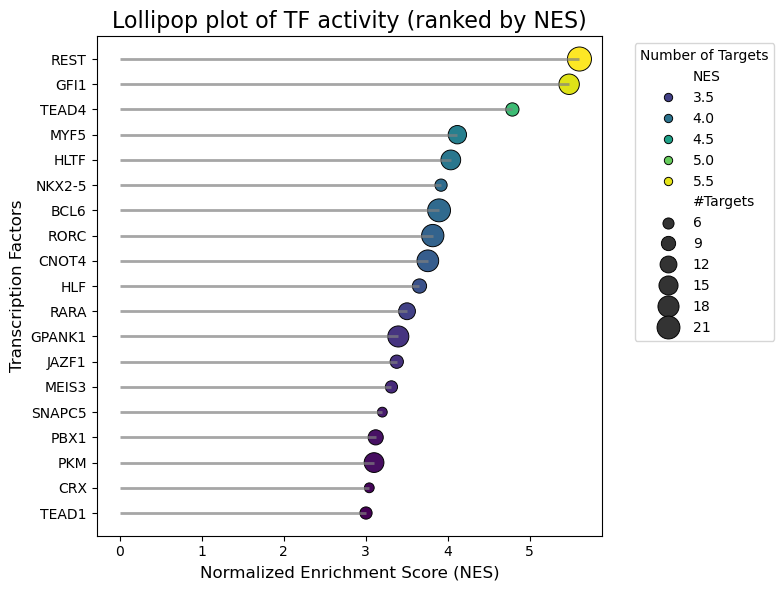

In [3]:
#Sort the data by NES for ranking
df = df.sort_values(by="NES", ascending=False)

#Create the plot
plt.figure(figsize=(8, 6))

#Plot the lollipop lines
plt.hlines(y=df["TF"], xmin=0, xmax=df["NES"], color='gray', alpha=0.7, linewidth=2)

#Plot the lollipop markers
sns.scatterplot(x="NES", y="TF", size="#Targets", hue= "NES", 
                sizes=(50, 300), data=df, legend='brief', edgecolor="black",
               palette= "viridis")

#Add title & labels
plt.title("Lollipop plot of TF activity (ranked by NES)", fontsize=16)
plt.xlabel("Normalized Enrichment Score (NES)", fontsize=12)
plt.ylabel("Transcription Factors", fontsize=12)

#Adjust the legend position
plt.legend(title="Number of Targets", bbox_to_anchor=(1.05, 1), loc='upper left')

#Save the plot as PDF
plt.savefig("ExtdFigure3D_BrainTargets_TF_Activity_Lollipop_05042025.pdf", format="pdf", dpi=600)
plt.tight_layout()
plt.show()

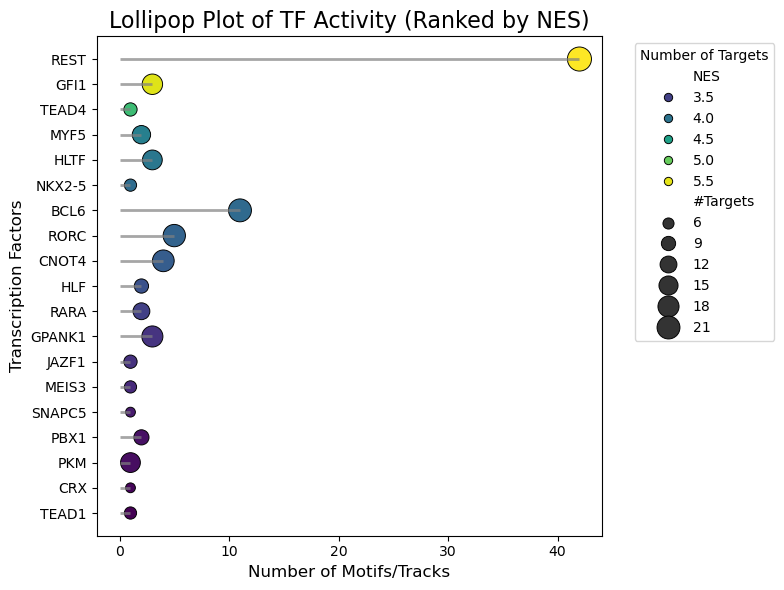

In [4]:
#Sort the data by NES for ranking
df = df.sort_values(by="NES", ascending=False)

#Create the plot
plt.figure(figsize=(8, 6))

#Plot the lollipop lines
plt.hlines(y=df["TF"], xmin=0, xmax=df["#Motifs/Tracks"], color='gray', alpha=0.7, linewidth=2)

#Plot the lollipop markers => but add the motif/track information for showing regulatory complexity & how REST stands out
#Ultimately, the above figure is shown as figure 3d for simplicity 
sns.scatterplot(x="#Motifs/Tracks", y="TF", size="#Targets", hue= "NES", 
                sizes=(50, 300), data=df, legend='brief', edgecolor="black",
               palette= "viridis")


plt.title("Lollipop Plot of TF Activity (Ranked by NES)", fontsize=16)
plt.xlabel("Number of Motifs/Tracks", fontsize=12)
plt.ylabel("Transcription Factors", fontsize=12)
plt.legend(title="Number of Targets", bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig("3D_BrainTargets_TF_Activity_Lollipop_v3_05042025.pdf", format="pdf", dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


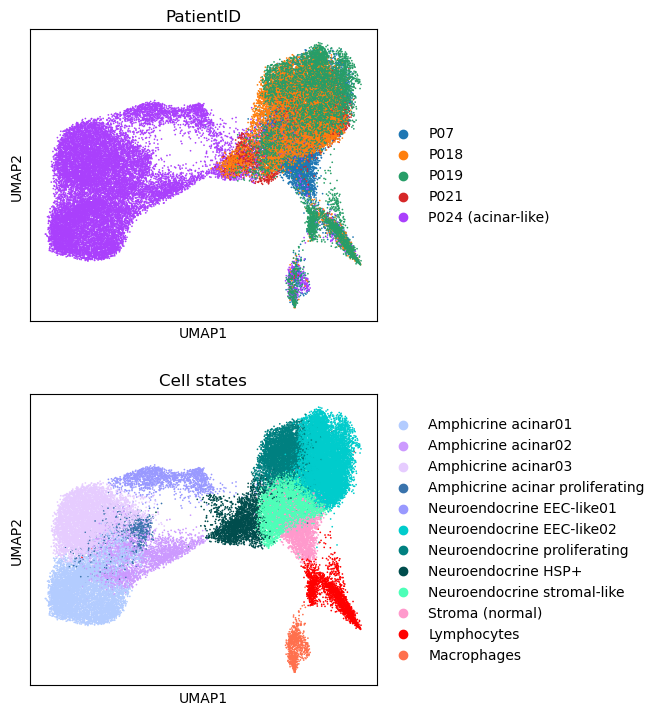

In [5]:
import scanpy as sc
import pandas as pd
import os

adata= sc.read_h5ad("./celltypist_benchmark/pNEC_updated_annot_07082023.h5ad")

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (4,4)

sc.pl.umap(adata, color= ['PatientID', 'Cell states'], size=6, ncols=1)

In [6]:
#Rename PatientID labels
adata.obs['PatientID'] = adata.obs['PatientID'].replace({
    'P07': 'P1',
    'P018': 'P2',
    'P019': 'P3',
    'P021': 'P4',
    'P024 (acinar-like)': 'P5 (acinar)'
})


print(adata.obs['PatientID'].value_counts()) 

#Rename Cell states labels
adata.obs['Cell states'] = adata.obs['Cell states'].replace({
    'Neuroendocrine EEC-like01': 'Amphicrine progenitor-like',
    'Neuroendocrine EEC-like02': 'Neuroendocrine',
    'Neuroendocrine HSP+': 'Neuroendocrine HSP+ (hypoxic)'
})

print(adata.obs['Cell states'].value_counts()) 

PatientID
P5 (acinar)    19497
P1              8768
P2              8314
P3              5580
P4              2856
Name: count, dtype: int64
Cell states
Neuroendocrine                     10095
Amphicrine acinar01                 7047
Amphicrine acinar03                 5840
Neuroendocrine stromal-like         5668
Neuroendocrine proliferating        4033
Stroma (normal)                     2465
Amphicrine acinar02                 2424
Neuroendocrine HSP+ (hypoxic)       2275
Lymphocytes                         2124
Amphicrine progenitor-like          1488
Macrophages                          821
Amphicrine acinar proliferating      735
Name: count, dtype: int64


/tmp/ipykernel_282444/1365199625.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['PatientID'] = adata.obs['PatientID'].replace({
/tmp/ipykernel_282444/1365199625.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['Cell states'] = adata.obs['Cell states'].replace({


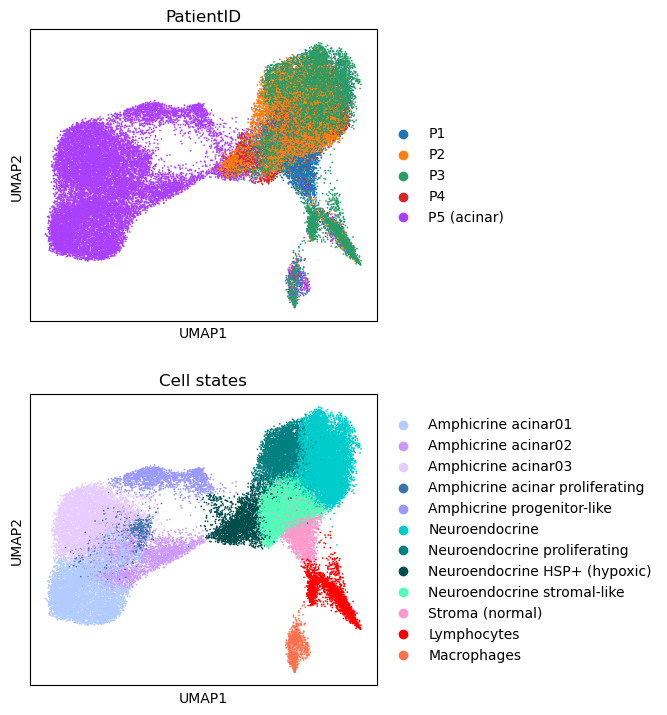

In [7]:
plt.rcParams['savefig.dpi'] = 300
sc.pl.umap(adata, color= ['PatientID', 'Cell states'], size=6, ncols=1) 

In [8]:
#Remove immune subsets:

adata_subset= adata[~adata.obs['Cell states'].isin(['Lymphocytes', 'Macrophages'])] 
adata_subset.obs['Cell states'].value_counts()

Cell states
Neuroendocrine                     10095
Amphicrine acinar01                 7047
Amphicrine acinar03                 5840
Neuroendocrine stromal-like         5668
Neuroendocrine proliferating        4033
Stroma (normal)                     2465
Amphicrine acinar02                 2424
Neuroendocrine HSP+ (hypoxic)       2275
Amphicrine progenitor-like          1488
Amphicrine acinar proliferating      735
Name: count, dtype: int64

In [9]:
#Normalize the anndata: 
adata_norm= adata_subset.raw.to_adata()

sc.pp.normalize_total(adata_norm, target_sum=1e4)  # Normalize counts per cell
sc.pp.log1p(adata_norm)  # Log-transform the data

categories: Amphicrine acinar01, Amphicrine acinar02, Amphicrine acinar03, etc.
var_group_labels: Alpha, Beta, Delta, etc.


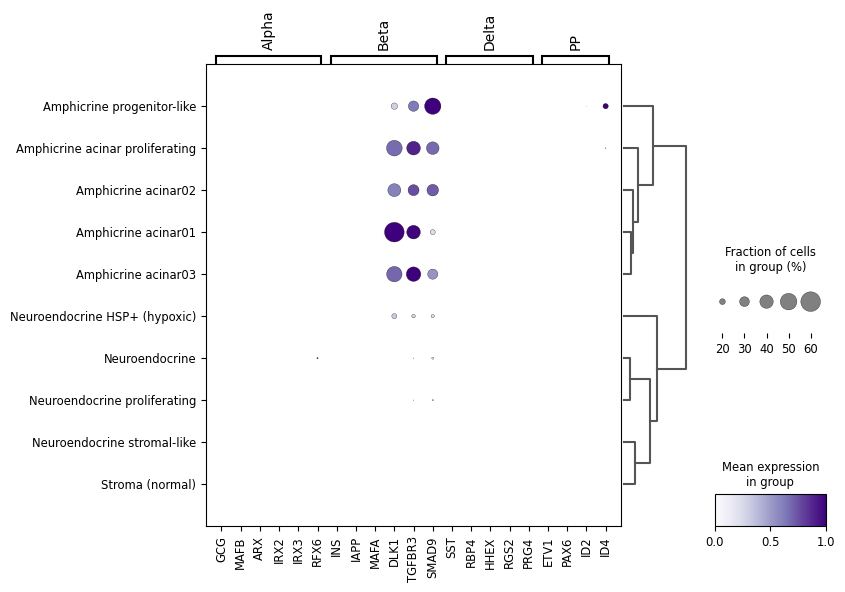

In [10]:
#We showed that panNEC shared NE cell states don't show key islet markers (unlike well differentiated panNETs) 

#Define marker genes & corresponding islet groups
marker_genes_dict = {
    "Alpha": ['GCG', 'MAFB', 'ARX', 'IRX2', 'IRX3', 'RFX6'],
    "Beta": ['INS', 'IAPP', 'MAFA', 'DLK1', 'TGFBR3', 'SMAD9'],
    "Delta": ['SST', 'RBP4', 'HHEX', 'RGS2', 'PRG4'],
    "PP": ['ETV1', 'PAX6', 'ID2', 'ID4']
}


#Plot using Scanpy's dotplot with grouped marker genes
sc.pl.dotplot(
    adata_norm,
    marker_genes_dict,
    groupby='Cell states',
    cmap='Purples',
    standard_scale='var',
    swap_axes=False,
    dendrogram=True,
    dot_min=0.1,
    dot_max=0.6,
    figsize=(8, 6),
    show=False
)

#Save the plot as PDF at 600 DPI
plt.savefig('ExtdFigure3B_islet_signature_dotplot_03042025.pdf', dpi=600)
plt.show()

In [11]:
#Brain atlas based cell state predictions: 3e & 3f: 

#Load the AnnData file (classified using brain development data)- panNEC_brain_classification_151014.ipynb
adata_brain = sc.read("./celltypist_benchmark/pNEC_updated_brain_classification_151024.h5ad")
adata_brain

AnnData object with n_obs × n_vars = 42070 × 32873
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'orig_cell_id', 'sample_id_final', 'group', 'sample_label', 'nCount_RNA.orig', 'nFeature_RNA.orig', 'percent_mito', 'percent_ribo', 'CellFilterKeep', 'patID', 'batch', 'seurat_clusters', 'cluster_label_Tosti_combined', 'cluster_type_Tosti_combined', 'cluster_label_single_MV', 'source_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_MT_genes', 'log1p_total_counts_MT_genes', 'pct_counts_MT_genes', 'total_counts_Ribo_genes', 'log1p_total_counts_Ribo_genes', 'pct_counts_Ribo_genes', 'total_counts_HB_genes', 'log1p_total_counts_HB_genes', 'pct_counts_HB_genes', 'percent_mt2', 'n_counts', 'percent_Ribo2', 'percent_HB2', 'S_score', 'G2M_score', 'phase', 'XIST-counts', 'res_1', 'res_0.5', 'Cycling (S)', 'Cycling (G2/M)', 'MYC signaling', 'Adhesive', 'Ribosomal', 'Interferon signaling', 'TNF-NFkB signaling', 'Acinar-like', 'Classical-

In [12]:
#To check how the LR based classifier was trained & led to these semi-supervised annotations, we'd refer to brain_atlas_predictions.ipynb under analysis subfolder

#We had to rename all the "Amphicrine cell states" as "Unclassified" (we couldn't back up the initial pred of Diencephalon like neurons as amphicrine
#states robustly express pancreatic acinar markers- so because of these mixed lineage effects, we can't call it a brain-like state) 
#Neuroendocrine EEC-like01: actually Amphicrine progenitor-like => immature stem cell like state without mature acinar markers => nicely predicted as PROX1 high neuroblasts! 
adata_brain.obs['Custom Clusters'] = adata_brain.obs['Cell states'].replace({
    'Amphicrine acinar01': 'Unclassified', #Diencephalon-like Neuron 
    'Amphicrine acinar02': 'Unclassified',
    'Amphicrine acinar03': 'Unclassified',
    'Amphicrine acinar proliferating': 'Unclassified',
    'Neuroendocrine EEC-like01': 'Neuroblast-like (PROX1 high)',
    'Neuroendocrine EEC-like02': 'Subcortical Neuron (RBFOX1 high)',
    'Neuroendocrine proliferating': 'Subcortical Neuron (prol)',
    'Neuroendocrine HSP+': 'Non-neuronal (Stress-associated)',
    'Neuroendocrine stromal-like': 'Subcortical Neuron (RBFOX1 low)',
    'Stroma (normal)': 'Brain-like fibroblast'
})

adata_brain.obs['Custom Clusters'].value_counts()

/tmp/ipykernel_282444/1948665149.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_brain.obs['Custom Clusters'] = adata_brain.obs['Cell states'].replace({


Custom Clusters
Unclassified                        16046
Subcortical Neuron (RBFOX1 high)    10095
Subcortical Neuron (RBFOX1 low)      5668
Subcortical Neuron (prol)            4033
Brain-like fibroblast                2465
Non-neuronal (Stress-associated)     2275
Neuroblast-like (PROX1 high)         1488
Name: count, dtype: int64

In [13]:
#Updated cluster colors
updated_cluster_colors = {
    'Unclassified': '#cc99ff',  #Light violet
    'Subcortical Neuron (RBFOX1 high)': '#66cccc',  #Sea green
    'Subcortical Neuron (prol)': '#00cccc',  # Deeper sea green
    'Subcortical Neuron (RBFOX1 low)': '#339999',  # Muted sea green
    'Non-neuronal (Stress-associated)': '#3973ac',  # Blue-ish stress-associated
    'Brain-like fibroblast': '#ff99cc',  # Pink fibroblasts
    'Neuroblast-like (PROX1 high)': '#ffcc99'  # Peach neuroblasts
}


#Map colors to Custom Clusters
adata_brain.uns['Custom Clusters_colors'] = [
    updated_cluster_colors[cluster] for cluster in adata_brain.obs['Custom Clusters'].cat.categories
]

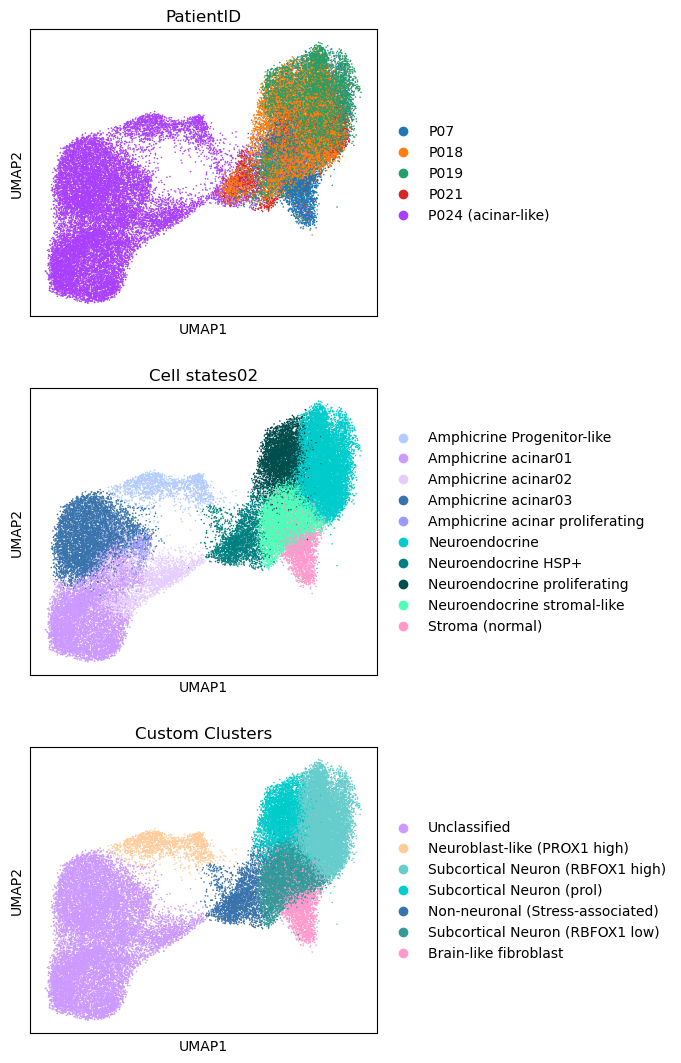

In [14]:
sc.pl.umap(adata_brain, color= ['PatientID', 'Cell states02', 'Custom Clusters'], size=5, ncols=1) 

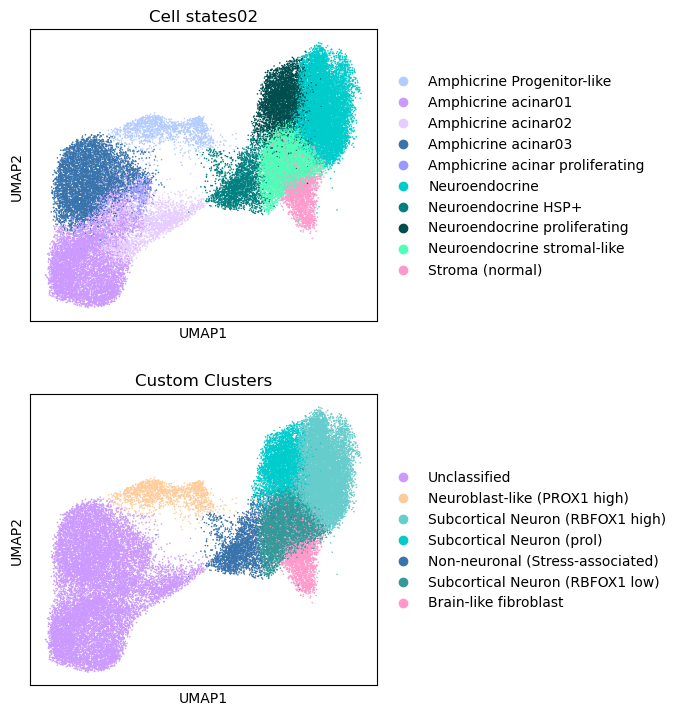

In [15]:
#Brain atlas based predictions (semi-supervised) shown in figure 3E. 
sc.pl.umap(adata_brain, color= ['Cell states02', 'Custom Clusters'], size=5, ncols=1, save= "_ExtdFig3E_brain_classification_03042025.pdf") 

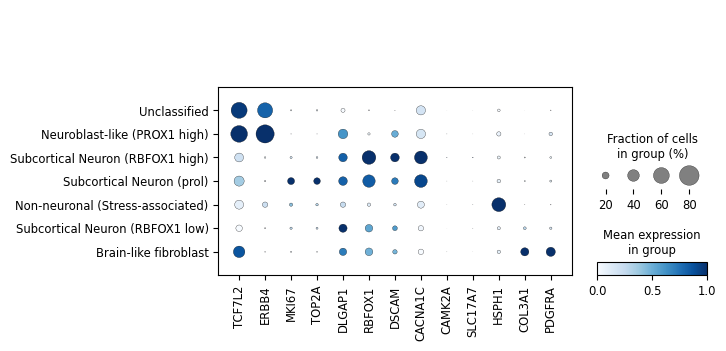

In [16]:
genes_to_plot = ['TCF7L2', 'ERBB4', 'MKI67', 'TOP2A', 'DLGAP1', 'RBFOX1', 'DSCAM', 
                 'CACNA1C', 'CAMK2A', 'SLC17A7', 
                 'HSPH1', 'COL3A1', 'PDGFRA']

sc.pl.dotplot(
    adata_brain,
    var_names=genes_to_plot,
    groupby='Custom Clusters',
    dot_max= 0.8,
    color_map='Blues',
    standard_scale='var',
    show=True
)

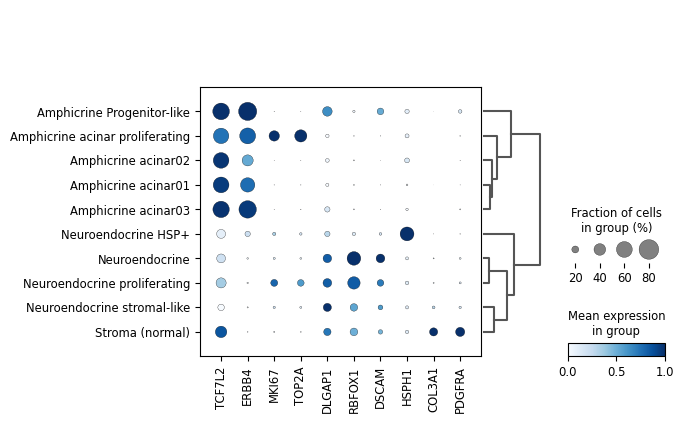

In [17]:
#Genes were chosen based on Celltypist predictions (top features contributing to predictions) & cross-checked based on known biology
genes_to_plot = ['TCF7L2', 'ERBB4', 'MKI67', 'TOP2A', 'DLGAP1', 'RBFOX1', 'DSCAM', 
                 'HSPH1', 'COL3A1', 'PDGFRA']

sc.pl.dotplot(
    adata_brain,
    var_names=genes_to_plot,
    groupby='Cell states02',
    dot_max= 0.8,
    color_map='Blues',
    standard_scale='var',
    show=True,
    dendrogram=True, 
    save= "_ExtdFig3F_DP_RBFOX1.pdf"
)